In [1]:
import os
os.sys.path.append('../project_code')

from data.bhsa import book_sets, get_data
from markov.Markov_Chain import *
from PCA.PCA import * 
from Clustering.Clustering_analysis import *
from Distance.Distances import *

test = get_data(books=["lbh","sbh"])
features = {'clause_types', 'phrase_functions', 'phrase_types', 'word_pos'}
domain = {'N', 'Q', 'D'}

# Transitions

In [2]:
data = collections.defaultdict(dict)
for f in features:
    for d in domain:
        transMatrix = transitionMatrix(test[f][d], False) 
        #Here, transformations can be performed
        transDict = df_dict_Transformation(transMatrix)
        data[f][d] = pd.DataFrame(transDict).fillna(0)

In [3]:
data["phrase_functions"]["N"].head(10)

,1_Chronicles,1_Kings,1_Samuel,2_Chronicles,2_Kings,2_Samuel,Deuteronomy,Esther,Exodus,Ezra,Genesis,Joshua,Judges,Leviticus,Nehemiah
Adju->Adju,24.0,5.0,5.0,21.0,4.0,1.0,4.0,3.0,7.0,3.0,16.0,3.0,4.0,1.0,7.0
Adju->Cmpl,23.0,6.0,5.0,31.0,11.0,9.0,2.0,6.0,2.0,3.0,10.0,12.0,14.0,2.0,3.0
Adju->Conj,81.0,83.0,45.0,182.0,75.0,61.0,31.0,32.0,97.0,28.0,79.0,51.0,40.0,12.0,43.0
Adju->Exst,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adju->Frnt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Adju->IntS,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adju->Intj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adju->Loca,1.0,2.0,0.0,10.0,4.0,2.0,0.0,0.0,3.0,1.0,1.0,4.0,2.0,0.0,0.0
Adju->ModS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adju->Modi,0.0,2.0,0.0,3.0,5.0,1.0,0.0,0.0,5.0,1.0,2.0,2.0,1.0,0.0,1.0


In [4]:
stack_Data = stackTransitions(data, features, "N")

# PCA

In [5]:
pca = PCA(n_components=2)

results_PCA = collections.defaultdict(lambda: collections.defaultdict(dict))
for f in features:
    for d in domain:
        if not data[f][d].empty:
            fit = pca.fit_transform(data[f][d].T.values) 
            results_PCA[f][d]["Fit"] = fit
            results_PCA[f][d]["var_Ratio"] = pca.explained_variance_ratio_

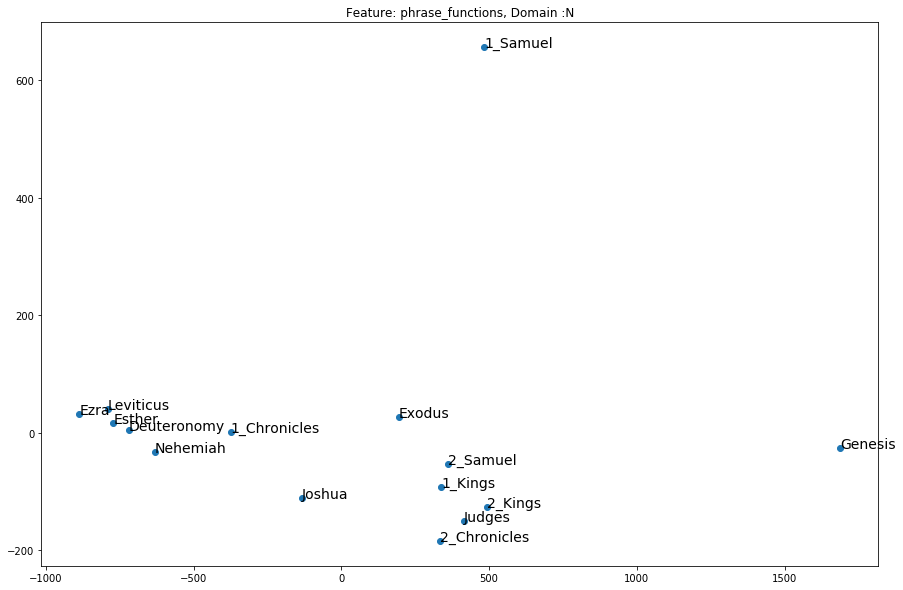

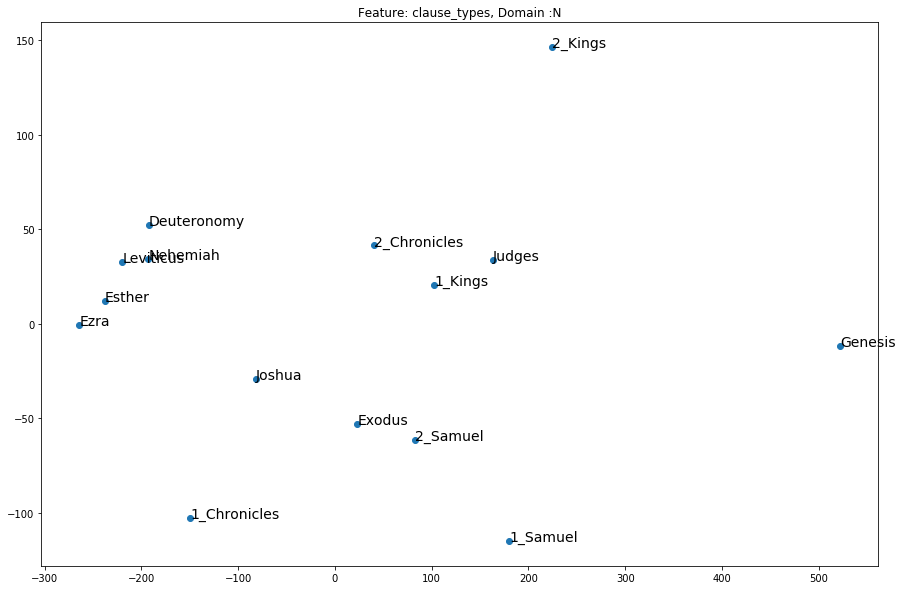

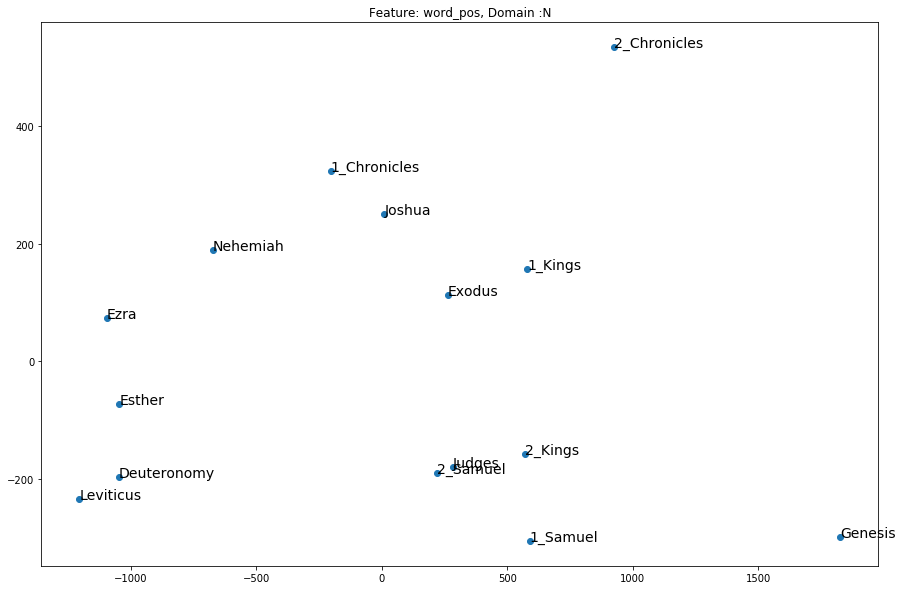

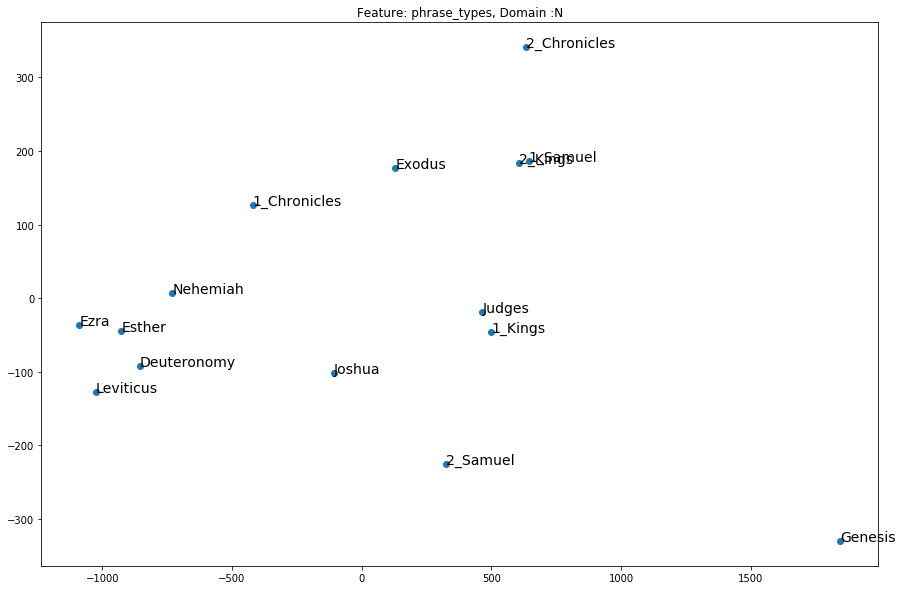

In [6]:
for f in features:
    for d in ["N"]:
        if len(results_PCA[f][d].keys())>0: 
            fit = results_PCA[f][d]["Fit"]
            plt.figure(1, figsize=(15, 10))     
            plt.scatter(fit[:, 0], fit[:, 1])
            books = data[f][d].keys()
            for i, book in enumerate(books):
                plt.annotate(book, xy=(fit[i, 0], fit[i, 1]), fontsize=14)
            plt.title("Feature: "+f+", Domain :"+d)
            plt.show()

# Clustering


In [5]:
print(simpleMetric)

{'canberra', 'braycurtis', 'cityblock', 'chebyshev', 'cosine', 'correlation', 'euclidean', 'sqeuclidean'}


In [35]:
distancemetric = matrixDistances(data["phrase_functions"]["N"].T.values, "canberra")

In [36]:
clusterMethods

{'average', 'centroid', 'complete', 'median', 'single', 'ward', 'weighted'}

In [37]:
Z = linkageFunction(distancemetric, "weighted")

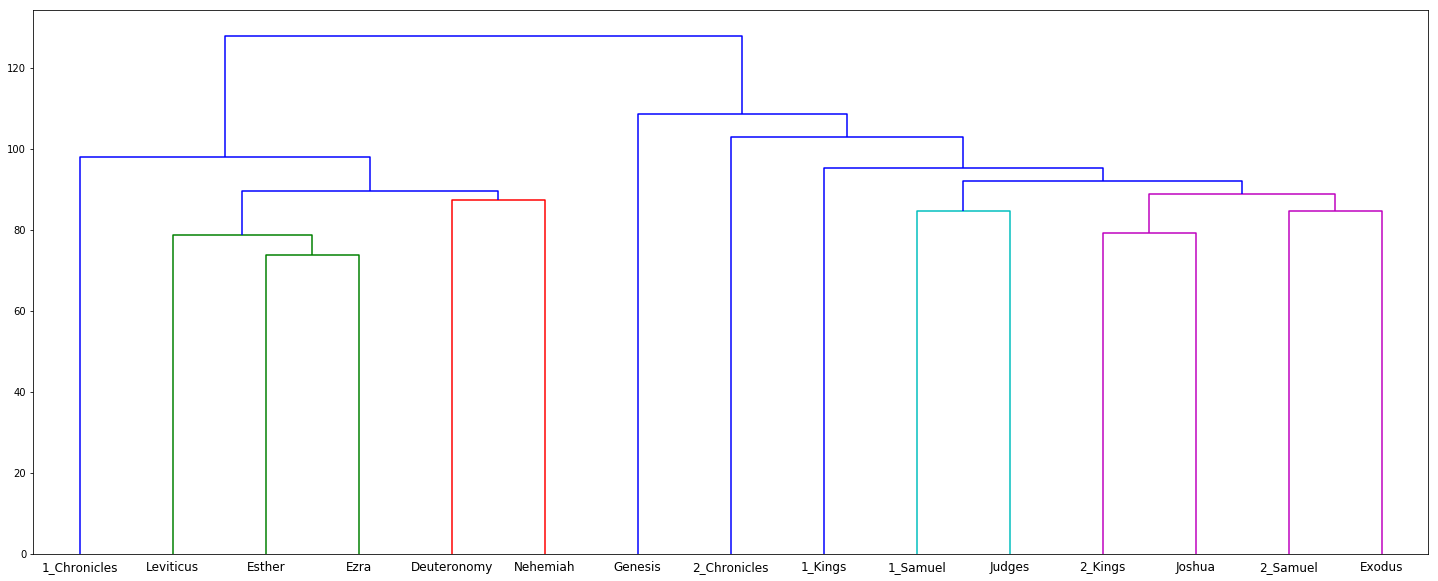

In [38]:
dendogramPlot(Z, data["phrase_functions"]["N"].keys())

In [40]:
flattenClustering(Z, 4, "maxclust")

array([1, 2, 2, 3, 2, 2, 1, 1, 2, 1, 4, 2, 2, 1, 1], dtype=int32)

In [146]:
nClusters = 2

results = collections.defaultdict(dict)
for f in features:
    for metric in simpleMetric:
        for method in clusterMethods:
            distancemetric = matrixDistances(data[f]["N"].T.values, metric)
            Z = linkageFunction(distancemetric, method)
            flat = flattenClustering(Z, nClusters, "maxclust")
            tag = f+ "|" + metric +"|" +method
            results[tag] = flat

In [147]:
df_Results = pd.DataFrame(results, index = data["phrase_functions"]["N"].keys()).T.head()

In [148]:
distancemetric = matrixDistances(df_Results.T.values, "jaccard")

In [149]:
pd.DataFrame(squareFormFunction(distancemetric), index = data["phrase_functions"]["N"].keys(),columns = data["phrase_functions"]["N"].keys())

,1_Chronicles,1_Kings,1_Samuel,2_Chronicles,2_Kings,2_Samuel,Deuteronomy,Esther,Exodus,Ezra,Genesis,Joshua,Judges,Leviticus,Nehemiah
1_Chronicles,0.0,0.2,0.2,0.2,0.2,0.2,0.4,0.4,0.2,0.6,0.4,0.0,0.2,0.4,0.2
1_Kings,0.2,0.0,0.0,0.0,0.0,0.0,0.6,0.6,0.0,0.8,0.2,0.2,0.0,0.6,0.4
1_Samuel,0.2,0.0,0.0,0.0,0.0,0.0,0.6,0.6,0.0,0.8,0.2,0.2,0.0,0.6,0.4
2_Chronicles,0.2,0.0,0.0,0.0,0.0,0.0,0.6,0.6,0.0,0.8,0.2,0.2,0.0,0.6,0.4
2_Kings,0.2,0.0,0.0,0.0,0.0,0.0,0.6,0.6,0.0,0.8,0.2,0.2,0.0,0.6,0.4
2_Samuel,0.2,0.0,0.0,0.0,0.0,0.0,0.6,0.6,0.0,0.8,0.2,0.2,0.0,0.6,0.4
Deuteronomy,0.4,0.6,0.6,0.6,0.6,0.6,0.0,0.0,0.6,0.2,0.8,0.4,0.6,0.0,0.2
Esther,0.4,0.6,0.6,0.6,0.6,0.6,0.0,0.0,0.6,0.2,0.8,0.4,0.6,0.0,0.2
Exodus,0.2,0.0,0.0,0.0,0.0,0.0,0.6,0.6,0.0,0.8,0.2,0.2,0.0,0.6,0.4
Ezra,0.6,0.8,0.8,0.8,0.8,0.8,0.2,0.2,0.8,0.0,1.0,0.6,0.8,0.2,0.4


In [150]:
Z = linkageFunction(distancemetric, "complete")

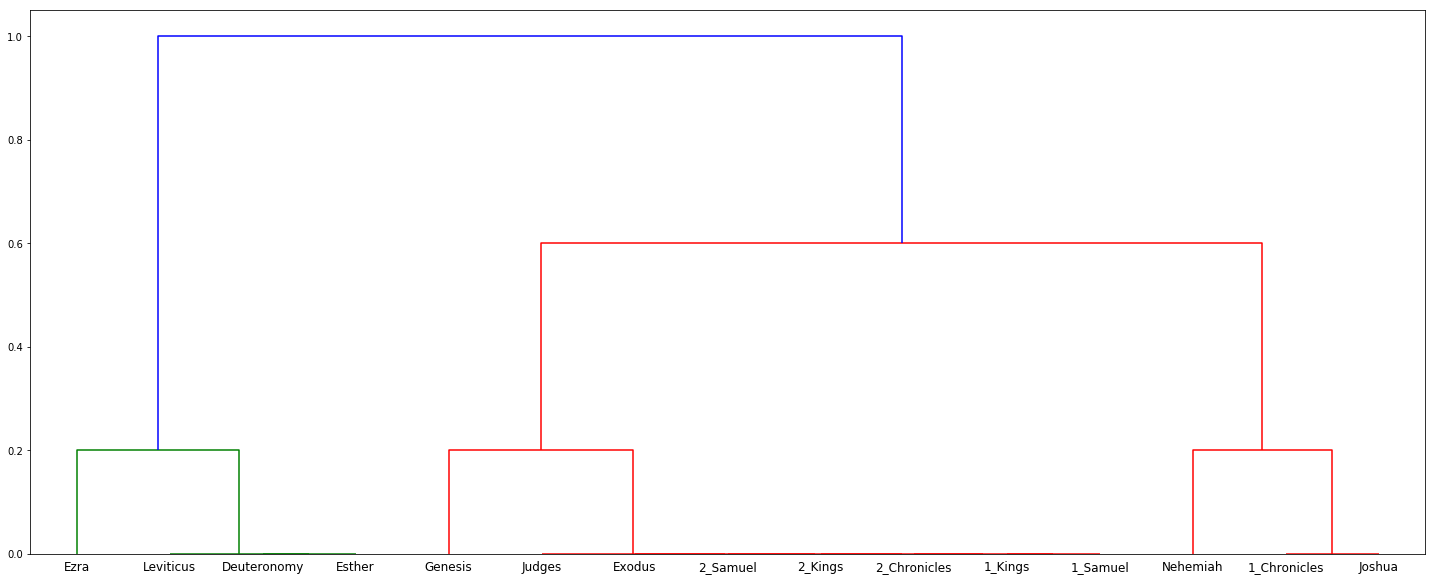

In [151]:
dendogramPlot(Z, data["phrase_functions"]["N"].keys())

In [152]:
row = flattenClustering(Z, 2, "maxclust")

In [153]:
pd.DataFrame(row, index = data["phrase_functions"]["N"].keys()).T

,1_Chronicles,1_Kings,1_Samuel,2_Chronicles,2_Kings,2_Samuel,Deuteronomy,Esther,Exodus,Ezra,Genesis,Joshua,Judges,Leviticus,Nehemiah
0,2,2,2,2,2,2,1,1,2,1,2,2,2,1,2
